In [1]:
import matplotlib.colors as colors
# load and autoreload
from IPython import get_ipython
from sect_sens.util.plot.plot_levlat import plot_levlat_abs, get_cbar_label
from useful_scit.imps import (np, plt, sns)
from sect_sens.data_info import get_nice_name_case
from sect_sens.util.imports import get_averaged_fields
from sect_sens.util.imports.get_fld_fixed import get_field_fixed
from sect_sens.util.plot.plot_levlat import plot_levlat_diff, get_cbar_eq_kwargs, make_cbar_kwargs
from sect_sens.constants import get_plotpath
from sect_sens.util.practical_functions import make_folders
from sect_sens.util.naming_conventions.var_info import get_fancy_var_name, get_fancy_unit_xr

from sect_sens.data_info.simulation_types import get_diff_by_type, get_abs_by_type

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from sect_sens.util.slice_average.significance import load_and_plot_sign

from useful_scit.plot.fig_manip import subp_insert_abc

In [3]:
model = 'NorESM'

startyear = '0004-01'
endyear = '0005-12'
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

In [4]:
cases_sec = [
    'NF1850_SECT_ctrl',
    'NF1850_aeroxid2014_SECT_ctrl',
    'NF1850_SECT_svoc_smax',
    'NF1850_aeroxid2014_SECT_svoc_smax',
    'NF1850_SECT_elvoc_smax',
    'NF1850_aeroxid2014_SECT_elvoc_smax'

    ]
cases_orig = [
    'NF1850_noSECT_def',
    'NF1850_aeroxid2014_noSECT_def',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc'
    ]

cases = cases_orig + cases_sec

In [5]:
norm_dic = dict(
    SOA_LV = colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01),
    H2SO4 = colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01),
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10),
    N_AER=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10),
    N=colors.SymLogNorm(vmin=-2e2, vmax=2e2, linthresh=1),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=1),# linscale=.5),
    AWNC_incld=colors.SymLogNorm(vmin=-50, vmax=50, linthresh=1),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1)
)

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  This is separate from the ipykernel package so we can avoid doing imports until
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  after removing the cwd from sys.path.
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specif

In [6]:
def abs_diffs(di_dic, ctrl, cases_oth, varl):
    fig, axs = plt.subplots(4,len(varl),
                        gridspec_kw={'height_ratios': [4,3,3, .3]},
                        figsize=[subfig_size*len(varl),subfig_size*3*asp_ratio])
    axs_diff = axs[1:-1,:]
    axs_diff_cb = axs[-1,:]
    #ctrl = 'OsloAeroSec'
    #cases_oth = ['OsloAero$_{imp}$','OsloAero$_{def}$']
    for i, var in enumerate(varl):
        print(i,var)
        saxs = axs_diff[:,i]
        ax = saxs[0]
        for case_oth, ax in zip(cases_oth, saxs.flatten()):
            _, im = plot_levlat_diff(var, ctrl,case_oth,
                                     di_dic,
                            cbar_orientation='horizontal',
                            #title=None,
                            ax=ax,
                            #ylim=None,
                            #figsize=None,
                            cmap='RdBu_r',
                            #use_ds_units=True,
                            #add_colorbar=True,
                            norm = norm_dic[var],
                            add_colorbar=False
                            )




        #ax.set_title(f'{key}: PIaerPD-PI')
        lab = f'$\Delta${get_cbar_label(di_dic[ctrl][var], var, diff=True)}'
        plt.colorbar(im, cax = axs_diff_cb[i],label=lab,  orientation='horizontal')

    for i, var in enumerate(varl):
        print(i,var)
        ax = axs[0,i]
        _, im = plot_levlat_abs(var, ctrl,
                                     di_dic,
                                     cbar_orientation='horizontal',
                                     #title=None,
                                     ax=ax,
                                     #ylim=None,
                                     #figsize=None,
                                     cmap='PuOr_r',
                                     #use_ds_units=True,
                                     #add_colorbar=True,
                                     norm = norm_dic[var],
                                     add_colorbar=False
                                     )

        #ax.set_title(f'{key}: PIaerPD-PI')
        lab = get_cbar_label(di_dic[ctrl][var], var, diff=True)
        plt.colorbar(im, ax = ax,label=lab,  orientation='horizontal')

    for i in range(len(axs_diff[:,0])):
        for j in range(len(axs_diff[0,:])):
            ax = axs_diff[i,j]
            if i<(len(axs_diff[:,0])-1):
                ax.set_xlabel('')
                plt.setp(ax.get_xticklabels(), visible=False)
            if i ==(len(axs_diff[:,0])-1):
                ax.set_xlabel('Latitude [$^\circ$N]')
            if j>0:
                plt.setp(ax.get_yticklabels(), visible=False)
                ax.set_ylabel('')
    for ax in axs[0,:]:
        ax.set_xlabel('')
        plt.setp(ax.get_xticklabels(), visible=False)
    for ax in axs[0,1:]:
        ax.set_ylabel('')
        plt.setp(ax.get_yticklabels(), visible=False)

    fig.tight_layout()
    return axs, fig

In [7]:
version = 'diffs_svoc'
plot_path = get_plotpath('levlat')
filen_base = plot_path + '/_%s' % version
# print(plot_path)
make_folders(plot_path)
pressure_adjust=True

varl = ['NCONC01', 'AWNC_incld', 'AREL_incld','HYGRO01','CLDLIQ', 'FREQL','N_AER']# 'N100','N250',
subfig_size = 2.9
asp_ratio = .9
print(varl)

['NCONC01', 'AWNC_incld', 'AREL_incld', 'HYGRO01', 'CLDLIQ', 'FREQL', 'N_AER']


In [8]:
case_dic = get_averaged_fields.get_levlat_cases(cases, varl, startyear, endyear,
                                                pressure_adjust=pressure_adjust)

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/NCONC01_0004-01-0005-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/AWNC_incld_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/AREL_incld_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/HYGRO01_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/CLDLIQ_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/FREQL_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/N_AER_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_aeroxid2014_noSECT_def/NCONC01_0004-01-0005-12.nc


In [9]:
relative=False
dic_diff = get_diff_by_type(case_dic, varl, ctrl ='PI', case_types=['PI', 'PIaerPD'],  #mod_types=['OsloAeroSec','OsloAero$_{def}$'],
                            relative=relative)

['PI', 'PIaerPD'] ['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']
subtracting NF1850_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_noSECT_def-NF1850_noSECT_def
subtracting NF1850_aeroxid2014_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_aeroxid2014_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_aeroxid2014_noSECT_def-NF1850_noSECT_def


In [10]:
from sect_sens.util.plot.levlat_PIPD import abs_diffs_PI_PD_sep
from sect_sens.data_info.simulation_types import get_abs_by_type
dic_abs =get_abs_by_type(case_dic,
                    case_types=['PI', 'PD'],
                    mod_types=['OsloAeroSec','OsloAeroSec$_{svoc}$','OsloAeroSec$_{elvoc}$','OsloAero$_{imp}$', 'OsloAero$_{def}$'])

['PI', 'PD'] ['OsloAeroSec', 'OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  # Remove the CWD from sys.path while we load stuff.
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value en

[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


{'OsloAeroSec': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df8f0e48>, 'OsloAeroSec$_{svoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df2932e8>, 'OsloAeroSec$_{elvoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe600461cc0>, 'cbar': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe6001ae160>, 'cbar_abs': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe60068dfd0>, 'type_tit': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df5144e0>}
/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs_svocNCONC01_PI_diff_PD_diff


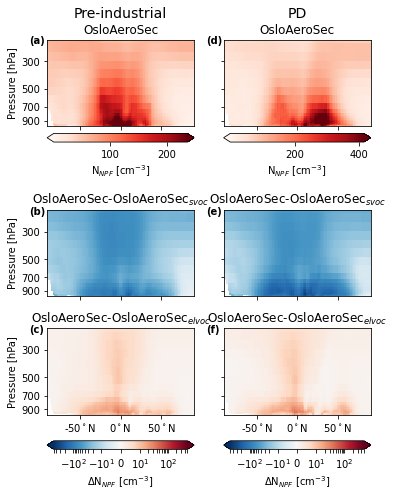

In [45]:
var='NCONC01'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                        var,
                        case_types=None,
                        ctrl='OsloAeroSec',
                        cases_oth=['OsloAeroSec$_{svoc}$','OsloAeroSec$_{elvoc}$'],#,'OsloAero$_{imp}$', 'OsloAero$_{def}$'],
                        sfg_size=2.9,
                        asp_rat=.9,
                        relative=False,
                    norm_diff=colors.SymLogNorm(vmin=-5e2, vmax=5e2, linthresh=10),#norm_dic[var], 
                    switch_diff=True
                   )
#plt.tight_layout()
fn = filen_base +f'{var}_PI_diff_PD_diff'
plt.savefig(fn+'.pdf', dpi=300)
print(fn)
plt.show()

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


{'OsloAeroSec': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df5ceba8>, 'OsloAeroSec$_{svoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df864a90>, 'OsloAeroSec$_{elvoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dfd6aba8>, 'cbar': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe644471240>, 'cbar_abs': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df613208>, 'type_tit': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df488d30>}
/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs_svocN_AER_PI_diff_PD_diff


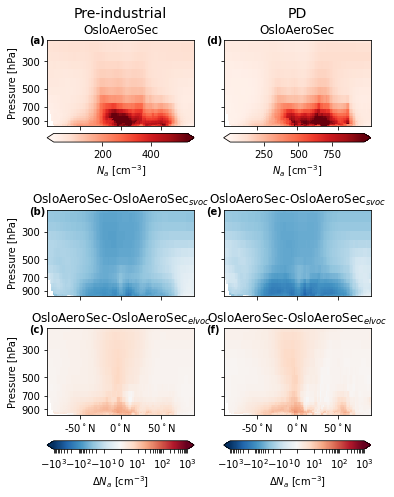

In [40]:
var='N_AER'
abs_diffs_PI_PD_sep(dic_abs,
                    var,
                    ctrl='OsloAeroSec',
                    cases_oth=['OsloAeroSec$_{svoc}$','OsloAeroSec$_{elvoc}$'],#'OsloAero$_{imp}$', 'OsloAero$_{def}$'],
                    sfg_size=2.9,
                    asp_rat=.9,
                    relative=False,
                    norm_diff=norm_dic[var],
                    switch_diff=True
                   )
#plt.tight_layout()
fn = filen_base +f'{var}_PI_diff_PD_diff'
plt.savefig(fn+'.pdf', dpi=300)
print(fn)
plt.show()

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  if sys.path[0] == '':
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  ret

[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


{'OsloAeroSec': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df257f28>, 'OsloAeroSec$_{svoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dfddba90>, 'OsloAeroSec$_{elvoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dfcaae10>, 'cbar': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dfcee240>, 'cbar_abs': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df352a20>, 'type_tit': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe6001aee48>}
/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs_svocAWNC_incld_PI_diff_PD_diff


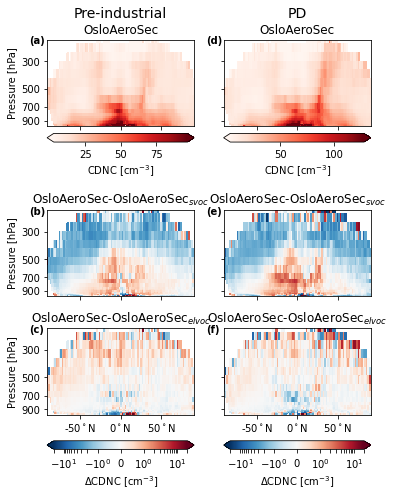

In [47]:

var='AWNC_incld'
    

abs_diffs_PI_PD_sep(dic_abs,
                    var,
                    case_types=None,
                    ctrl='OsloAeroSec',
                    cases_oth=['OsloAeroSec$_{svoc}$','OsloAeroSec$_{elvoc}$'],#'OsloAero$_{imp}$', 'OsloAero$_{def}$'],
                    sfg_size=2.9,
                    asp_rat=.9,
                    relative=False,
                    norm_diff=colors.SymLogNorm(vmin=-20, vmax=20, linthresh=1),#norm_dic[var],
                    switch_diff=True
                   )
#plt.tight_layout()
fn = filen_base +f'{var}_PI_diff_PD_diff'
plt.savefig(fn+'.pdf', dpi=300)
print(fn)
plt.show()

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


{'OsloAeroSec': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dd699898>, 'OsloAeroSec$_{svoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df7a0b38>, 'OsloAeroSec$_{elvoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dfd6a0b8>, 'OsloAero$_{imp}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe6005c96a0>, 'OsloAero$_{def}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df4d9518>, 'cbar': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe6005e98d0>, 'cbar_abs': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dd637be0>, 'type_tit': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dd976f60>}
/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs_svocFREQL_PI_diff_PD_diff


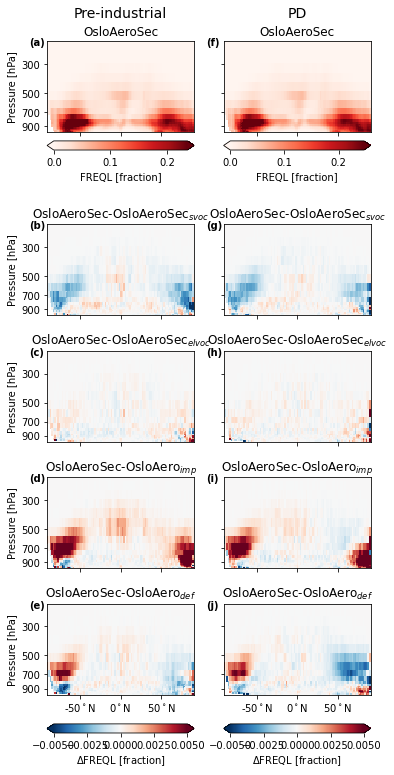

In [34]:

var='FREQL'
abs_diffs_PI_PD_sep(dic_abs,
                        var,
                        case_types=None,
                    ctrl='OsloAeroSec',
                    cases_oth=['OsloAeroSec$_{svoc}$','OsloAeroSec$_{elvoc}$','OsloAero$_{imp}$', 'OsloAero$_{def}$'],

                        sfg_size=2.9,
                        asp_rat=.9,
                        relative=False,
                    norm_diff=colors.Normalize(vmin=-.005,vmax=.005),
                    switch_diff=True
                   )
#plt.tight_layout()
fn = filen_base +f'{var}_PI_diff_PD_diff'
plt.savefig(fn+'.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs_svocCLDLIQ_PI_diff_PD_diff


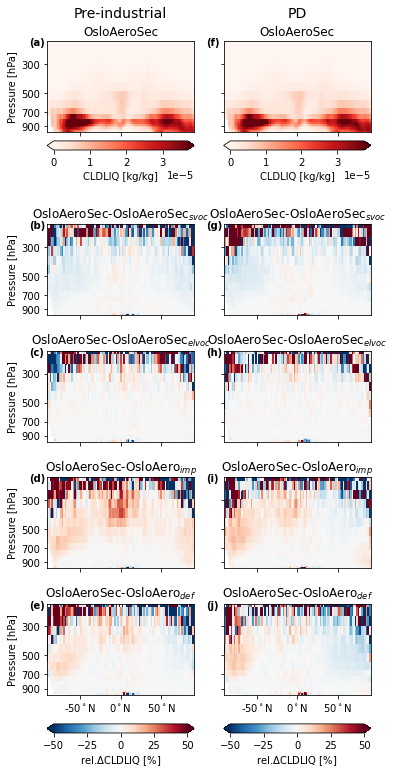

In [11]:
var='CLDLIQ'
abs_diffs_PI_PD_sep(dic_abs,
                        var,
                        case_types=None,
                    ctrl='OsloAeroSec',
                    cases_oth=['OsloAeroSec$_{svoc}$','OsloAeroSec$_{elvoc}$','OsloAero$_{imp}$', 'OsloAero$_{def}$'],
                        sfg_size=2.9,
                        asp_rat=.9,
                        relative=True,
                    norm_diff=colors.Normalize(vmin=-50,vmax=50),
                    switch_diff=True
                   )
#plt.tight_layout()
fn = filen_base +f'{var}_PI_diff_PD_diff'
plt.savefig(fn+'.pdf', dpi=300)
print(fn)
plt.show()

relative!!


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


{'OsloAeroSec': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dff641d0>, 'OsloAeroSec$_{svoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe600367a90>, 'OsloAeroSec$_{elvoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe6003bfef0>, 'cbar': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df245fd0>, 'cbar_abs': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe6006dc978>, 'type_tit': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dffc5a90>}


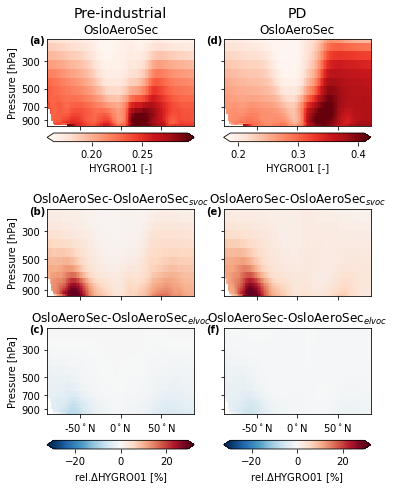

In [43]:
var='HYGRO01'
abs_diffs_PI_PD_sep(dic_abs,
                        var,
                        case_types=None,
                    ctrl='OsloAeroSec',
                    cases_oth=['OsloAeroSec$_{svoc}$','OsloAeroSec$_{elvoc}$'],#'OsloAero$_{imp}$', 'OsloAero$_{def}$'],
                        sfg_size=2.9,
                        asp_rat=.9,
                        relative=True,
                    
                    switch_diff=True
                    #norm_diff=norm_dic[var]
                   )
plt.show()

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[1000.0, 200]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


{'OsloAeroSec': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dd6ea7f0>, 'OsloAeroSec$_{svoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dd348b70>, 'OsloAeroSec$_{elvoc}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dd9eeeb8>, 'OsloAero$_{imp}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dd548278>, 'OsloAero$_{def}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe600377588>, 'cbar': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dfba3710>, 'cbar_abs': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe600667940>, 'type_tit': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df6b6fd0>}


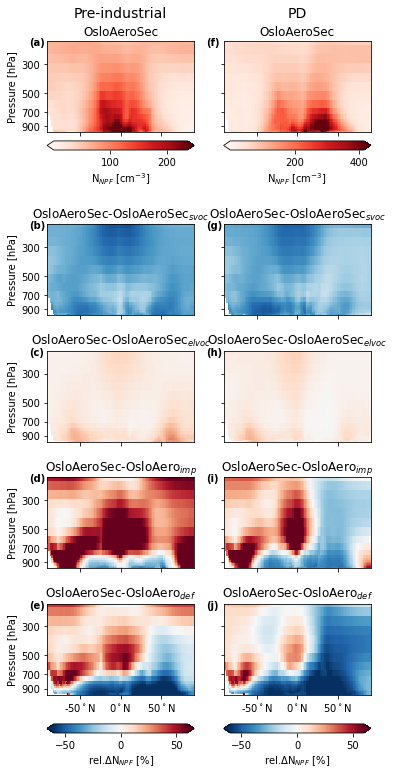

In [39]:

var='NCONC01'
abs_diffs_PI_PD_sep(dic_abs,
                    var,
                    case_types=None,
                    ctrl='OsloAeroSec',
                    cases_oth=['OsloAeroSec$_{svoc}$','OsloAeroSec$_{elvoc}$','OsloAero$_{imp}$', 'OsloAero$_{def}$'],
                    sfg_size=2.9,
                    asp_rat=.9,
                    relative=True,
                    switch_diff=True,
                    norm_diff=colors.Normalize(vmin=-60,vmax=60)
                   )
plt.show()

relative!!


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args)

[1000.0, 200]
[1000.0, 200]
{'OsloAeroSec': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5dd5c7cf8>, 'OsloAero$_{imp}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe6003ab518>, 'OsloAero$_{def}$': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe61004bf60>, 'cbar': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe600375198>, 'cbar_abs': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe6101cb860>, 'type_tit': <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5df74cc88>}


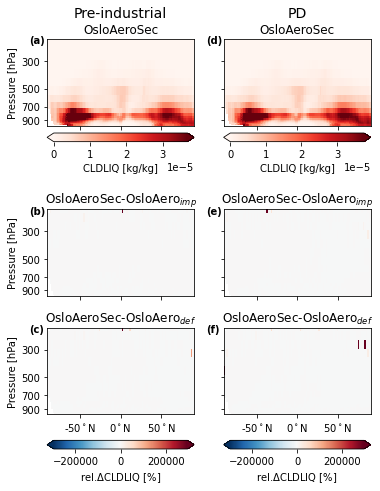

In [32]:

var='CLDLIQ'
abs_diffs_PI_PD_sep(dic_abs,
                        var,
                        case_types=None,
                        ctrl=None,
                        cases_oth=None,
                        sfg_size=2.9,
                        asp_rat=.9,
                        relative=True,
                    switch_diff=True                    
                    #norm_diff=norm_dic[var]
                   )
plt.show()